# Tarea Semanal 13

## Punto 1

## Analitico
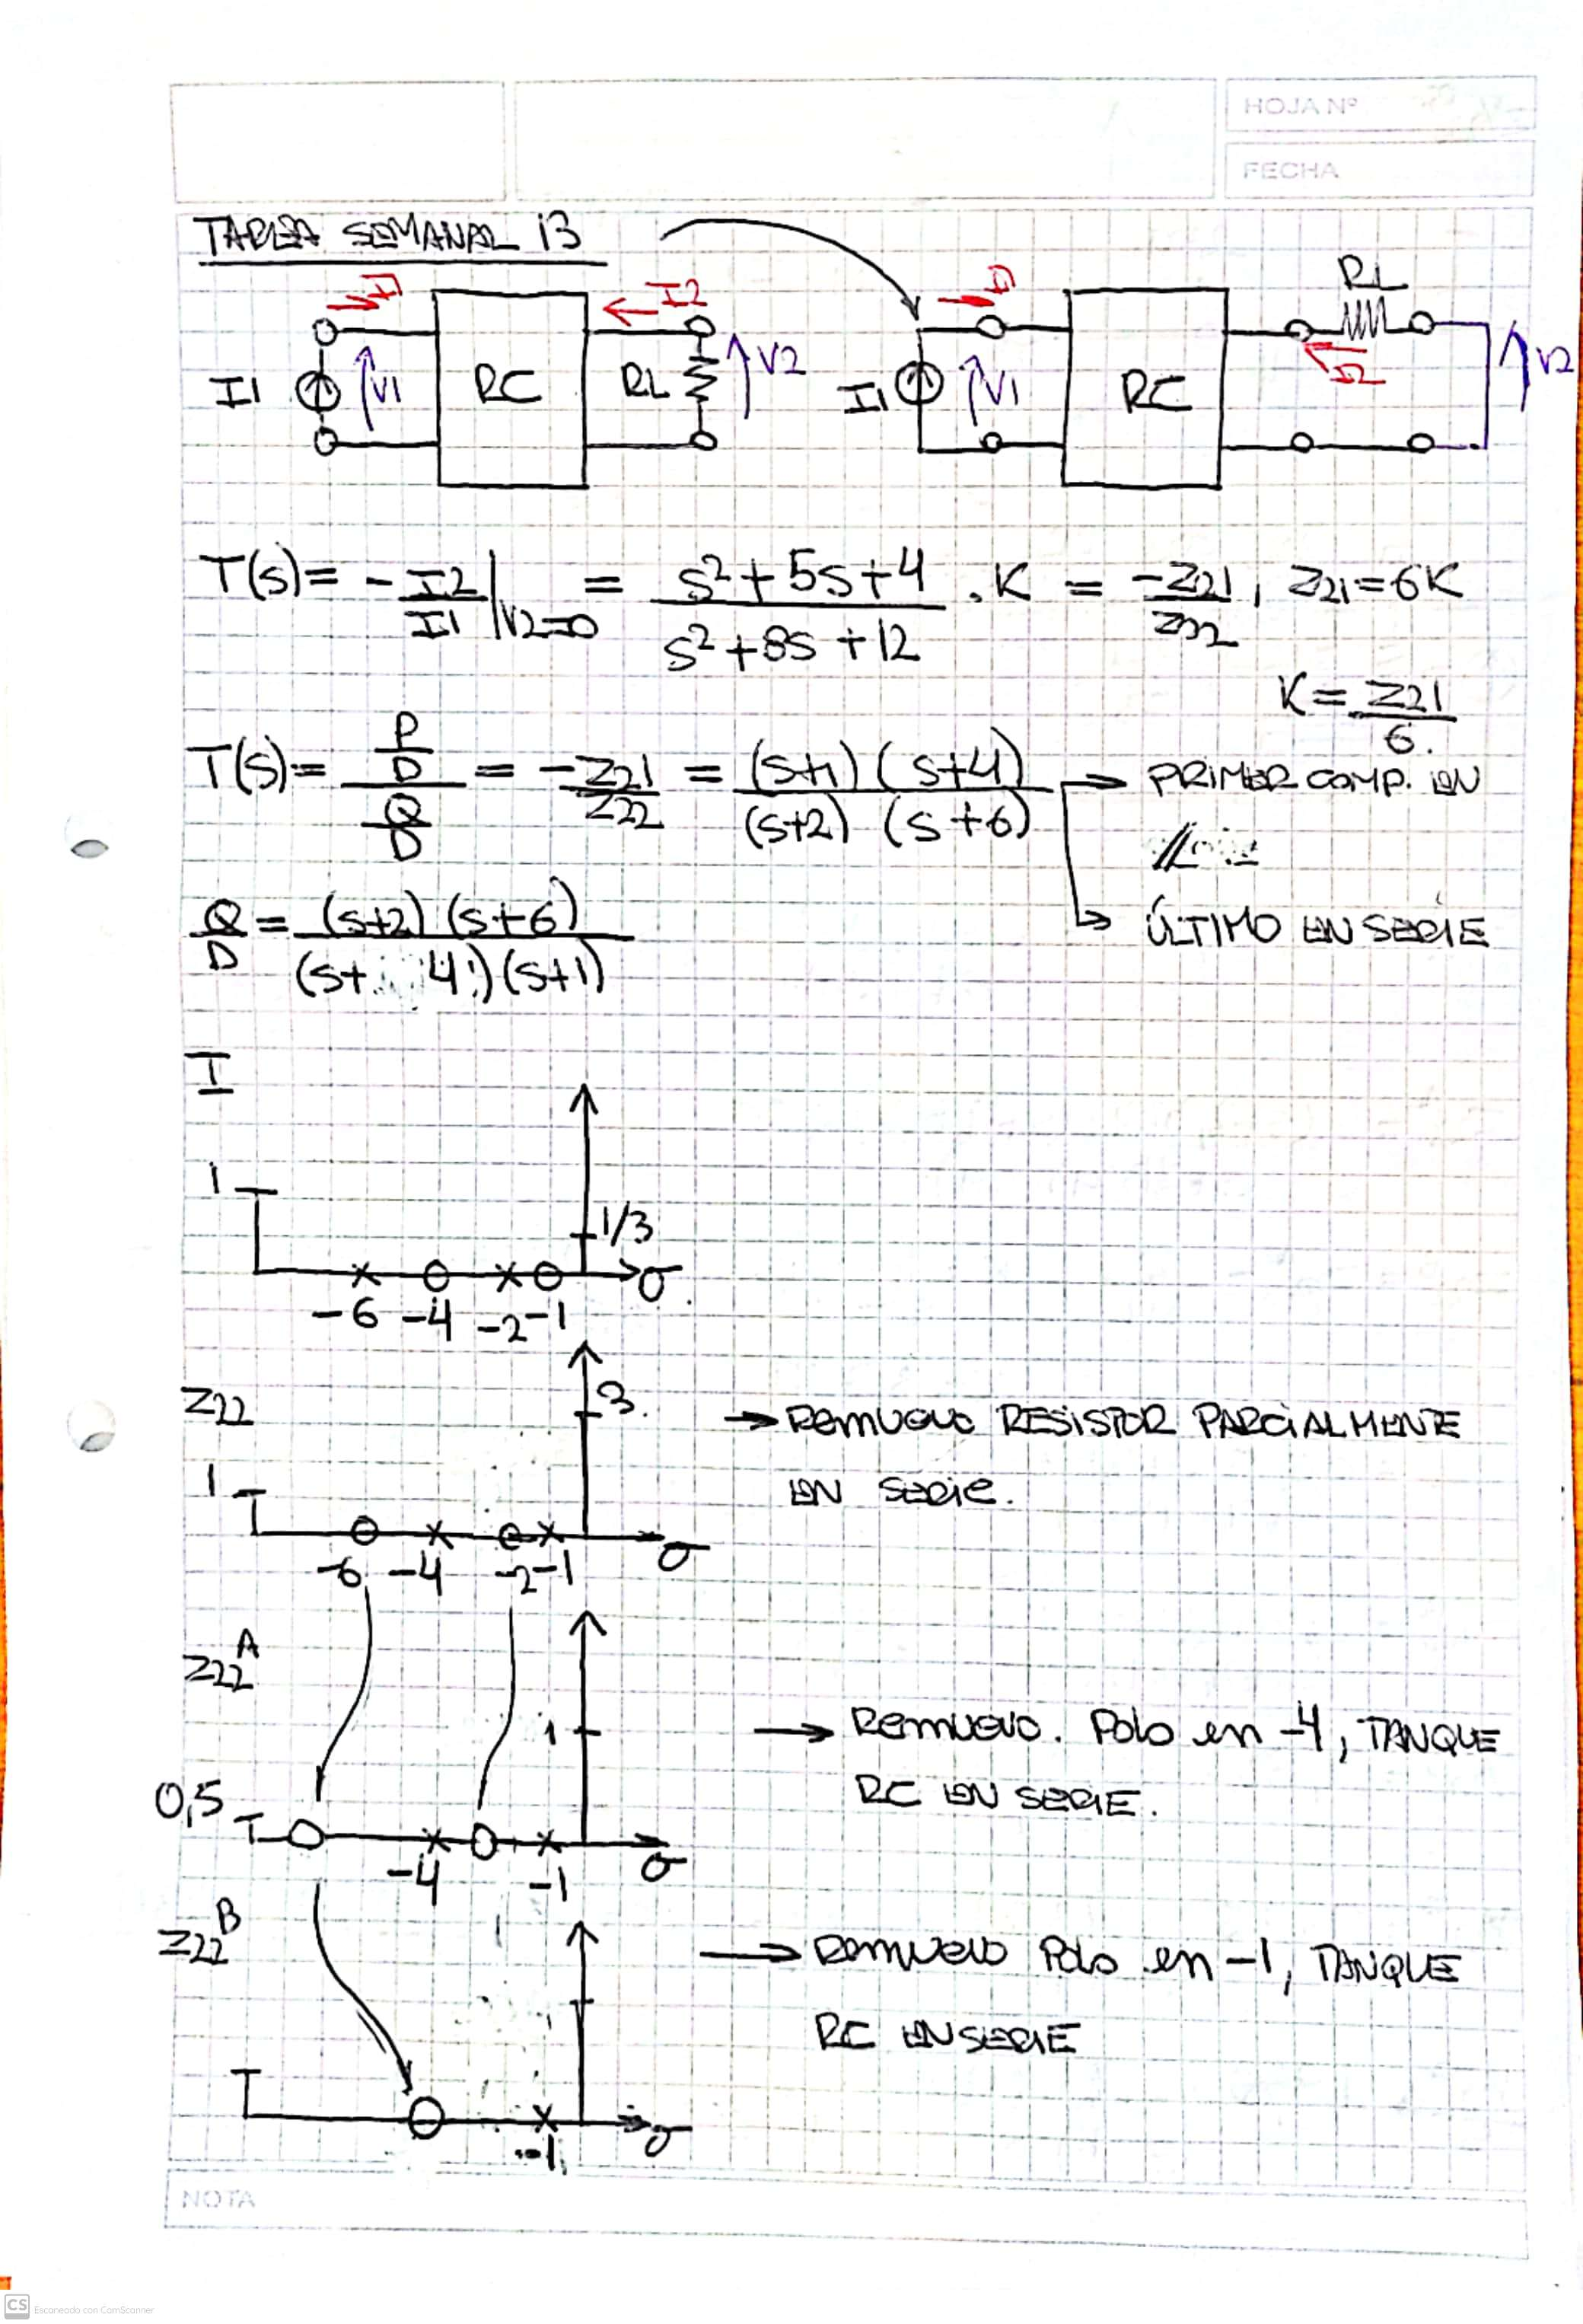

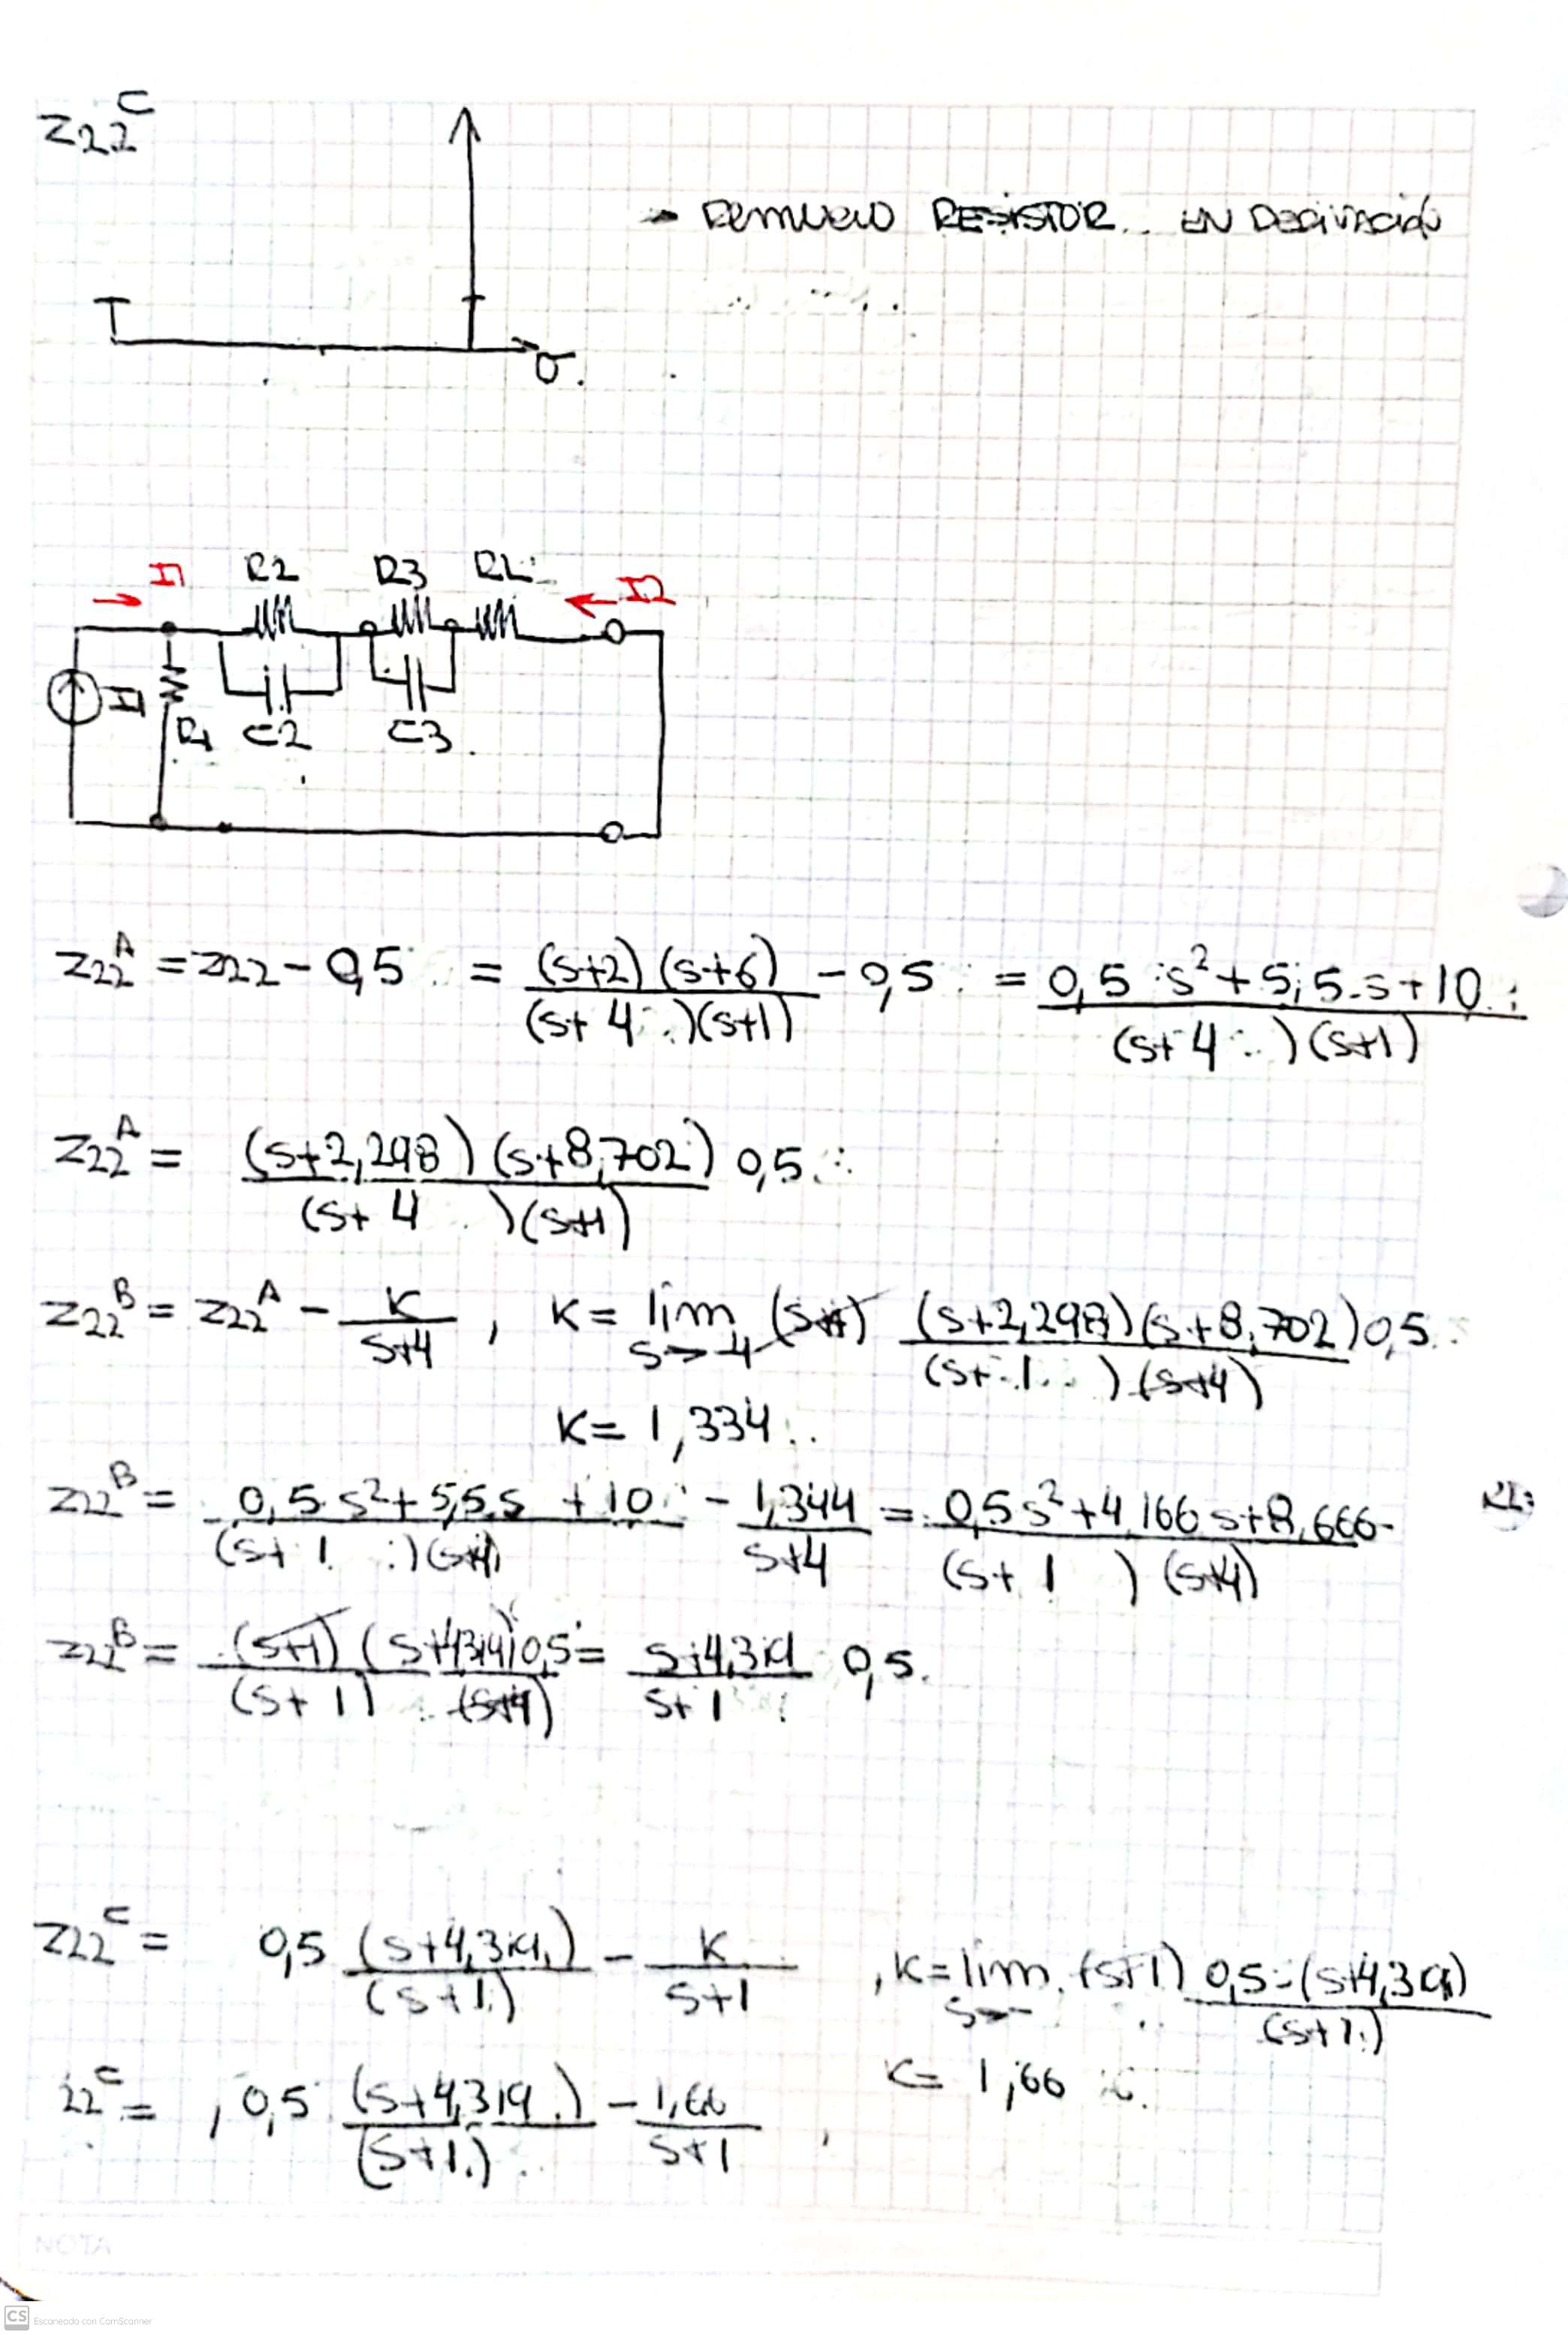

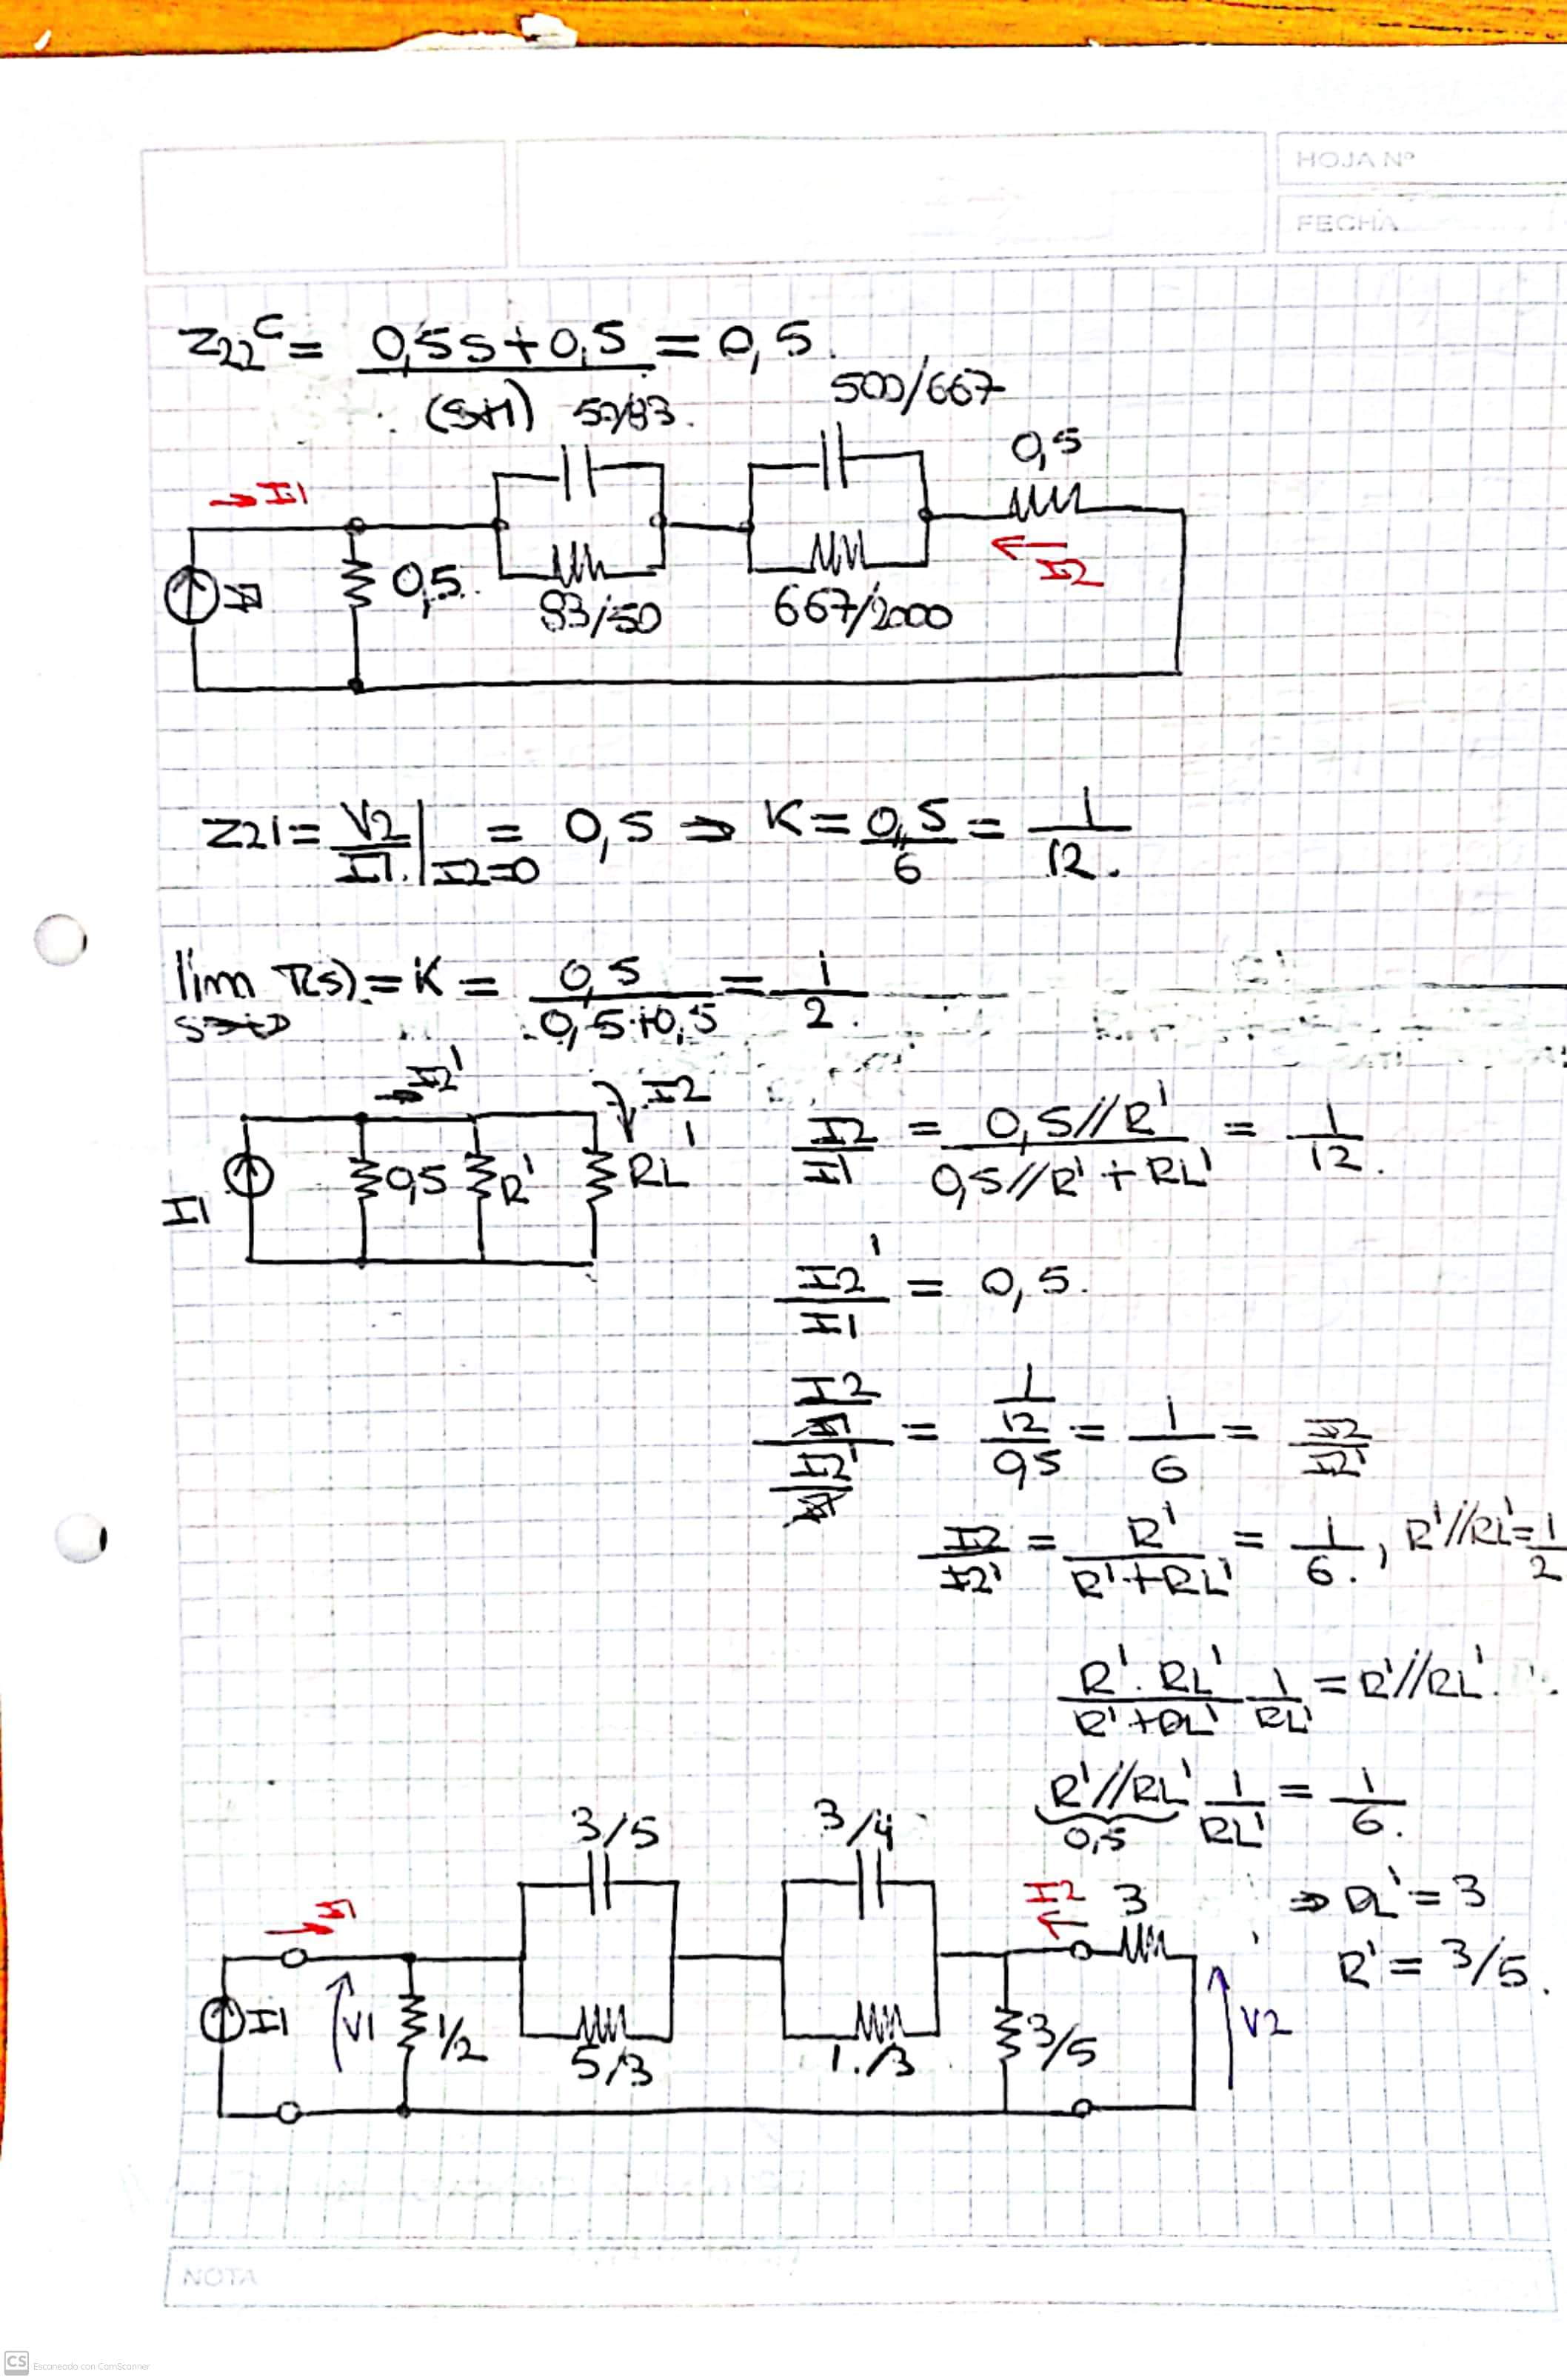

## Simulacion

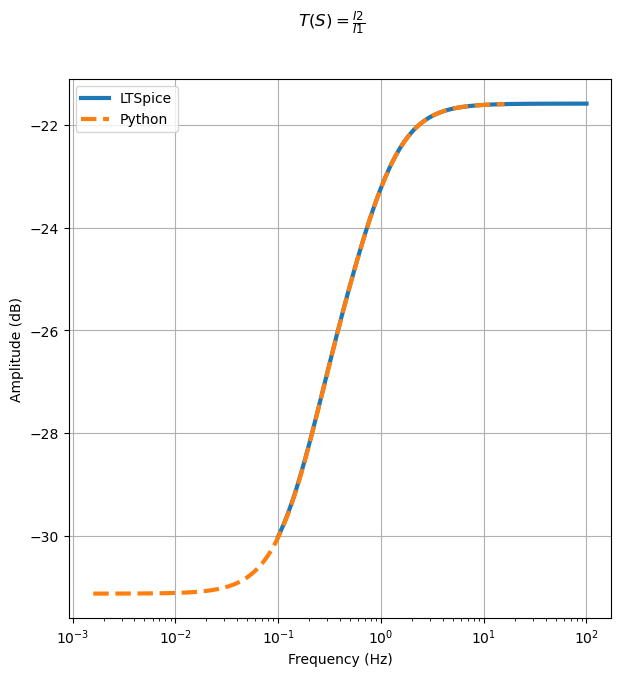

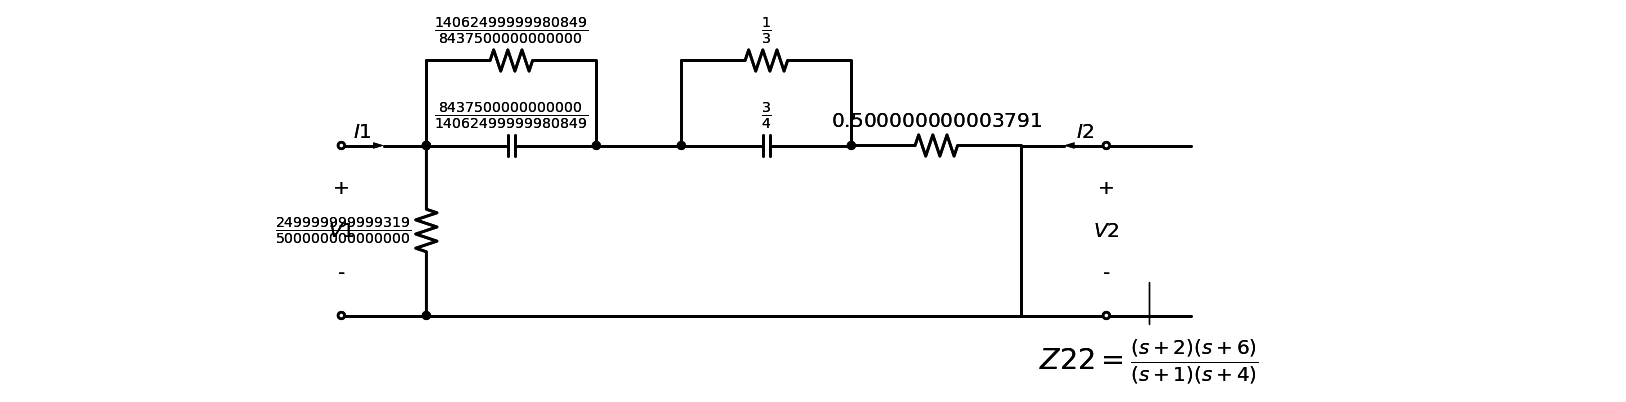

In [23]:
import ltspice

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

import splane as splane

import sympy as sim

from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor, Line


l = ltspice.Ltspice('Punto 1.raw')
l.parse()


plt.close('all')


#%% Punto 1

freq = l.get_frequency()
T =l.get_data('I(RL)')

fig, ax = plt.subplots(1, 1, figsize=(7,7))
fig.suptitle(r'$T(S) = \frac{I2}{I1}$')

ax.semilogx(freq, 20 * np.log10(np.abs(T)), label='LTSpice',linewidth=3)


ax.grid()
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Amplitude (dB)")

k=1/12

num = k*np.array([1,5,4])
den = np.array([1,8,12])


w,H = sig.freqs(num,den)

ax.semilogx(w/(2*np.pi),20*np.log10(np.abs(H)),label='Python',ls='--',linewidth=3)

plt.legend()
plt.show()


s = sim.symbols('s ', complex=True)

Z22 = (s+2)*(s+6)/((s+4)*(s+1))

Z22_A, RL = splane.remover_valor(Z22, 8.7015621187593)


Z22_B,kk,R3,C3 = splane.remover_polo_sigma(Z22_A,4,isImpedance=True,isRC=True)

Z22_C,kk,R2,C2 = splane.remover_polo_sigma(Z22_B,1,isImpedance=True,isRC=True)

Z22_C,R1 = splane.remover_valor_en_infinito(Z22_C)

d = Drawing(unit=4) 

d = splane.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V1$', '-'), 
                        current_lbl = '$I1$')


d = splane.dibujar_elemento_derivacion(d, Resistor, R1)

d = splane.dibujar_tanque_RC_serie(d, R2, C2)

d = splane.dibujar_espaciador(d)

d = splane.dibujar_tanque_RC_serie(d, R3, C3)

d = splane.dibujar_elemento_serie(d, Resistor, RL)

d += Line().down().length(d.unit)
d += Line().up().length(d.unit)
d = splane.dibujar_puerto_salida(d,
                        voltage_lbl = ('+', '$V2$', '-'), 
                        current_lbl = '$I2$')

d, zz_lbl = splane.dibujar_funcion_exc_abajo(d, 
                                          'Z22',  
                                         Z22, 
                                         hacia_salida = False,
                                         k_gap_width = 0.5)

display(d)


### Observacion : la transferencia no esta escalada por 1/12 en la simulacion como requiere la consigna. Falta una resistencia RL = 3 y otra en derivacion de 3/5 en la salida.

## Punto2 

## Analitico
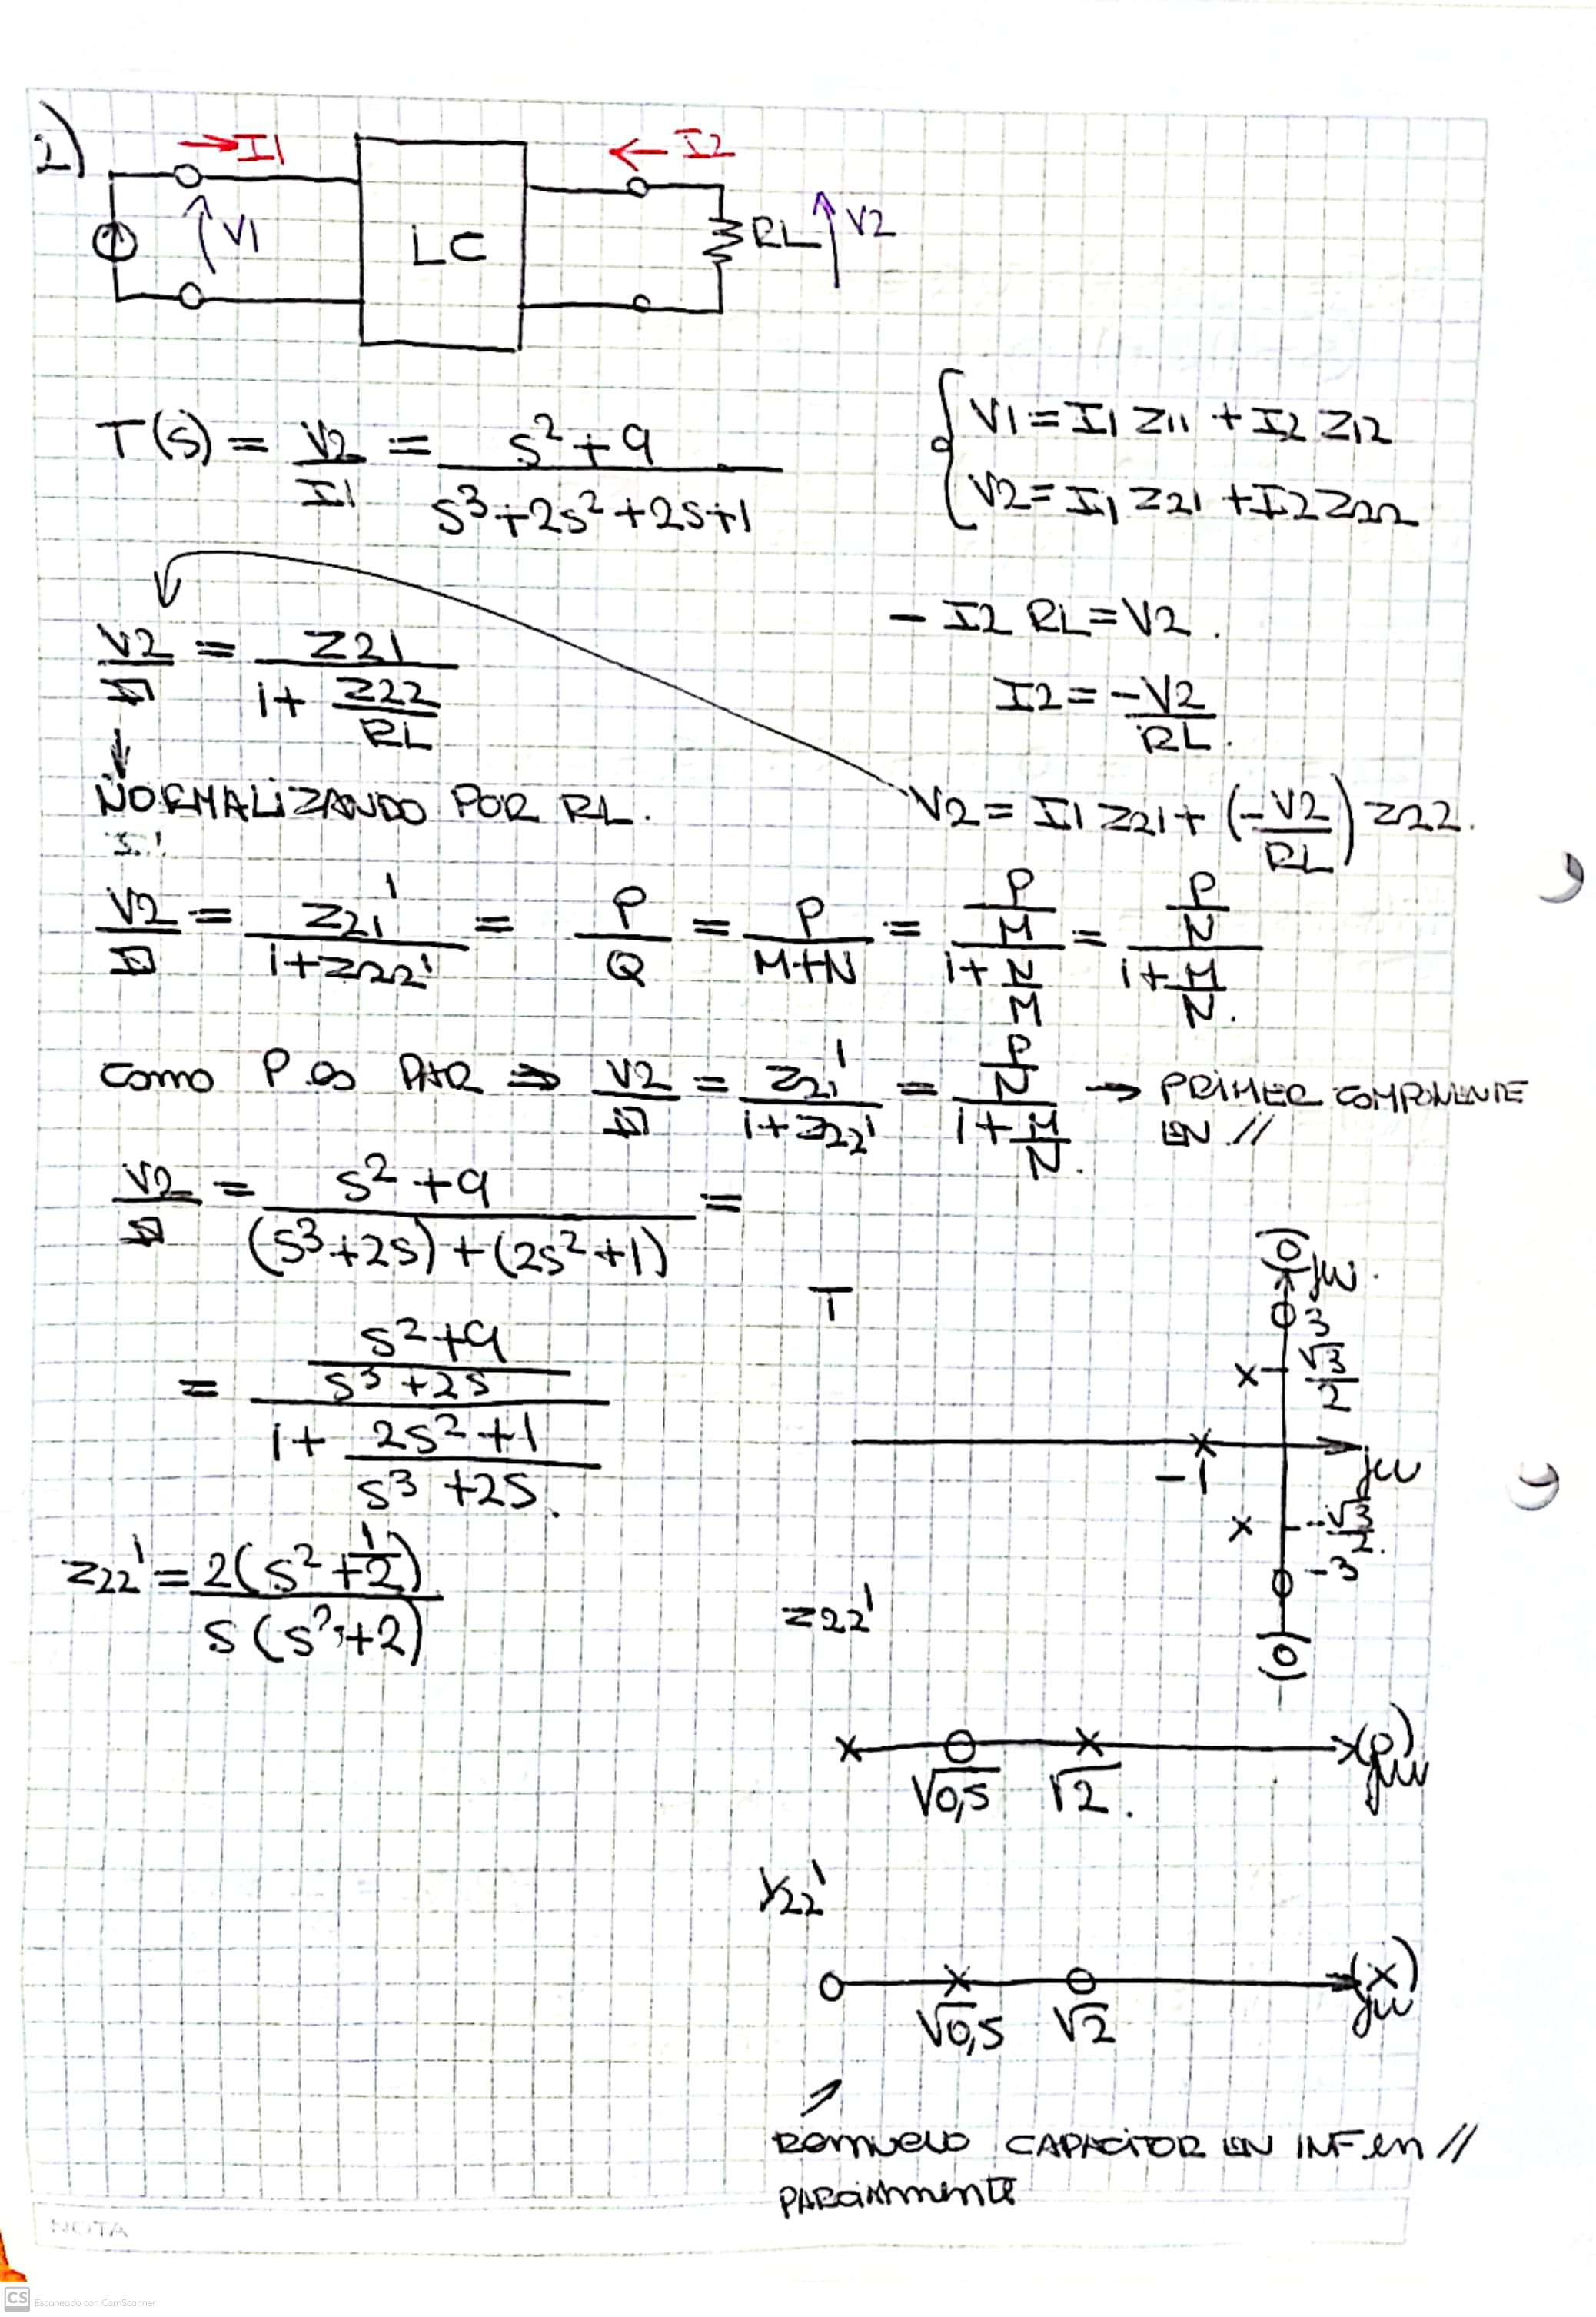

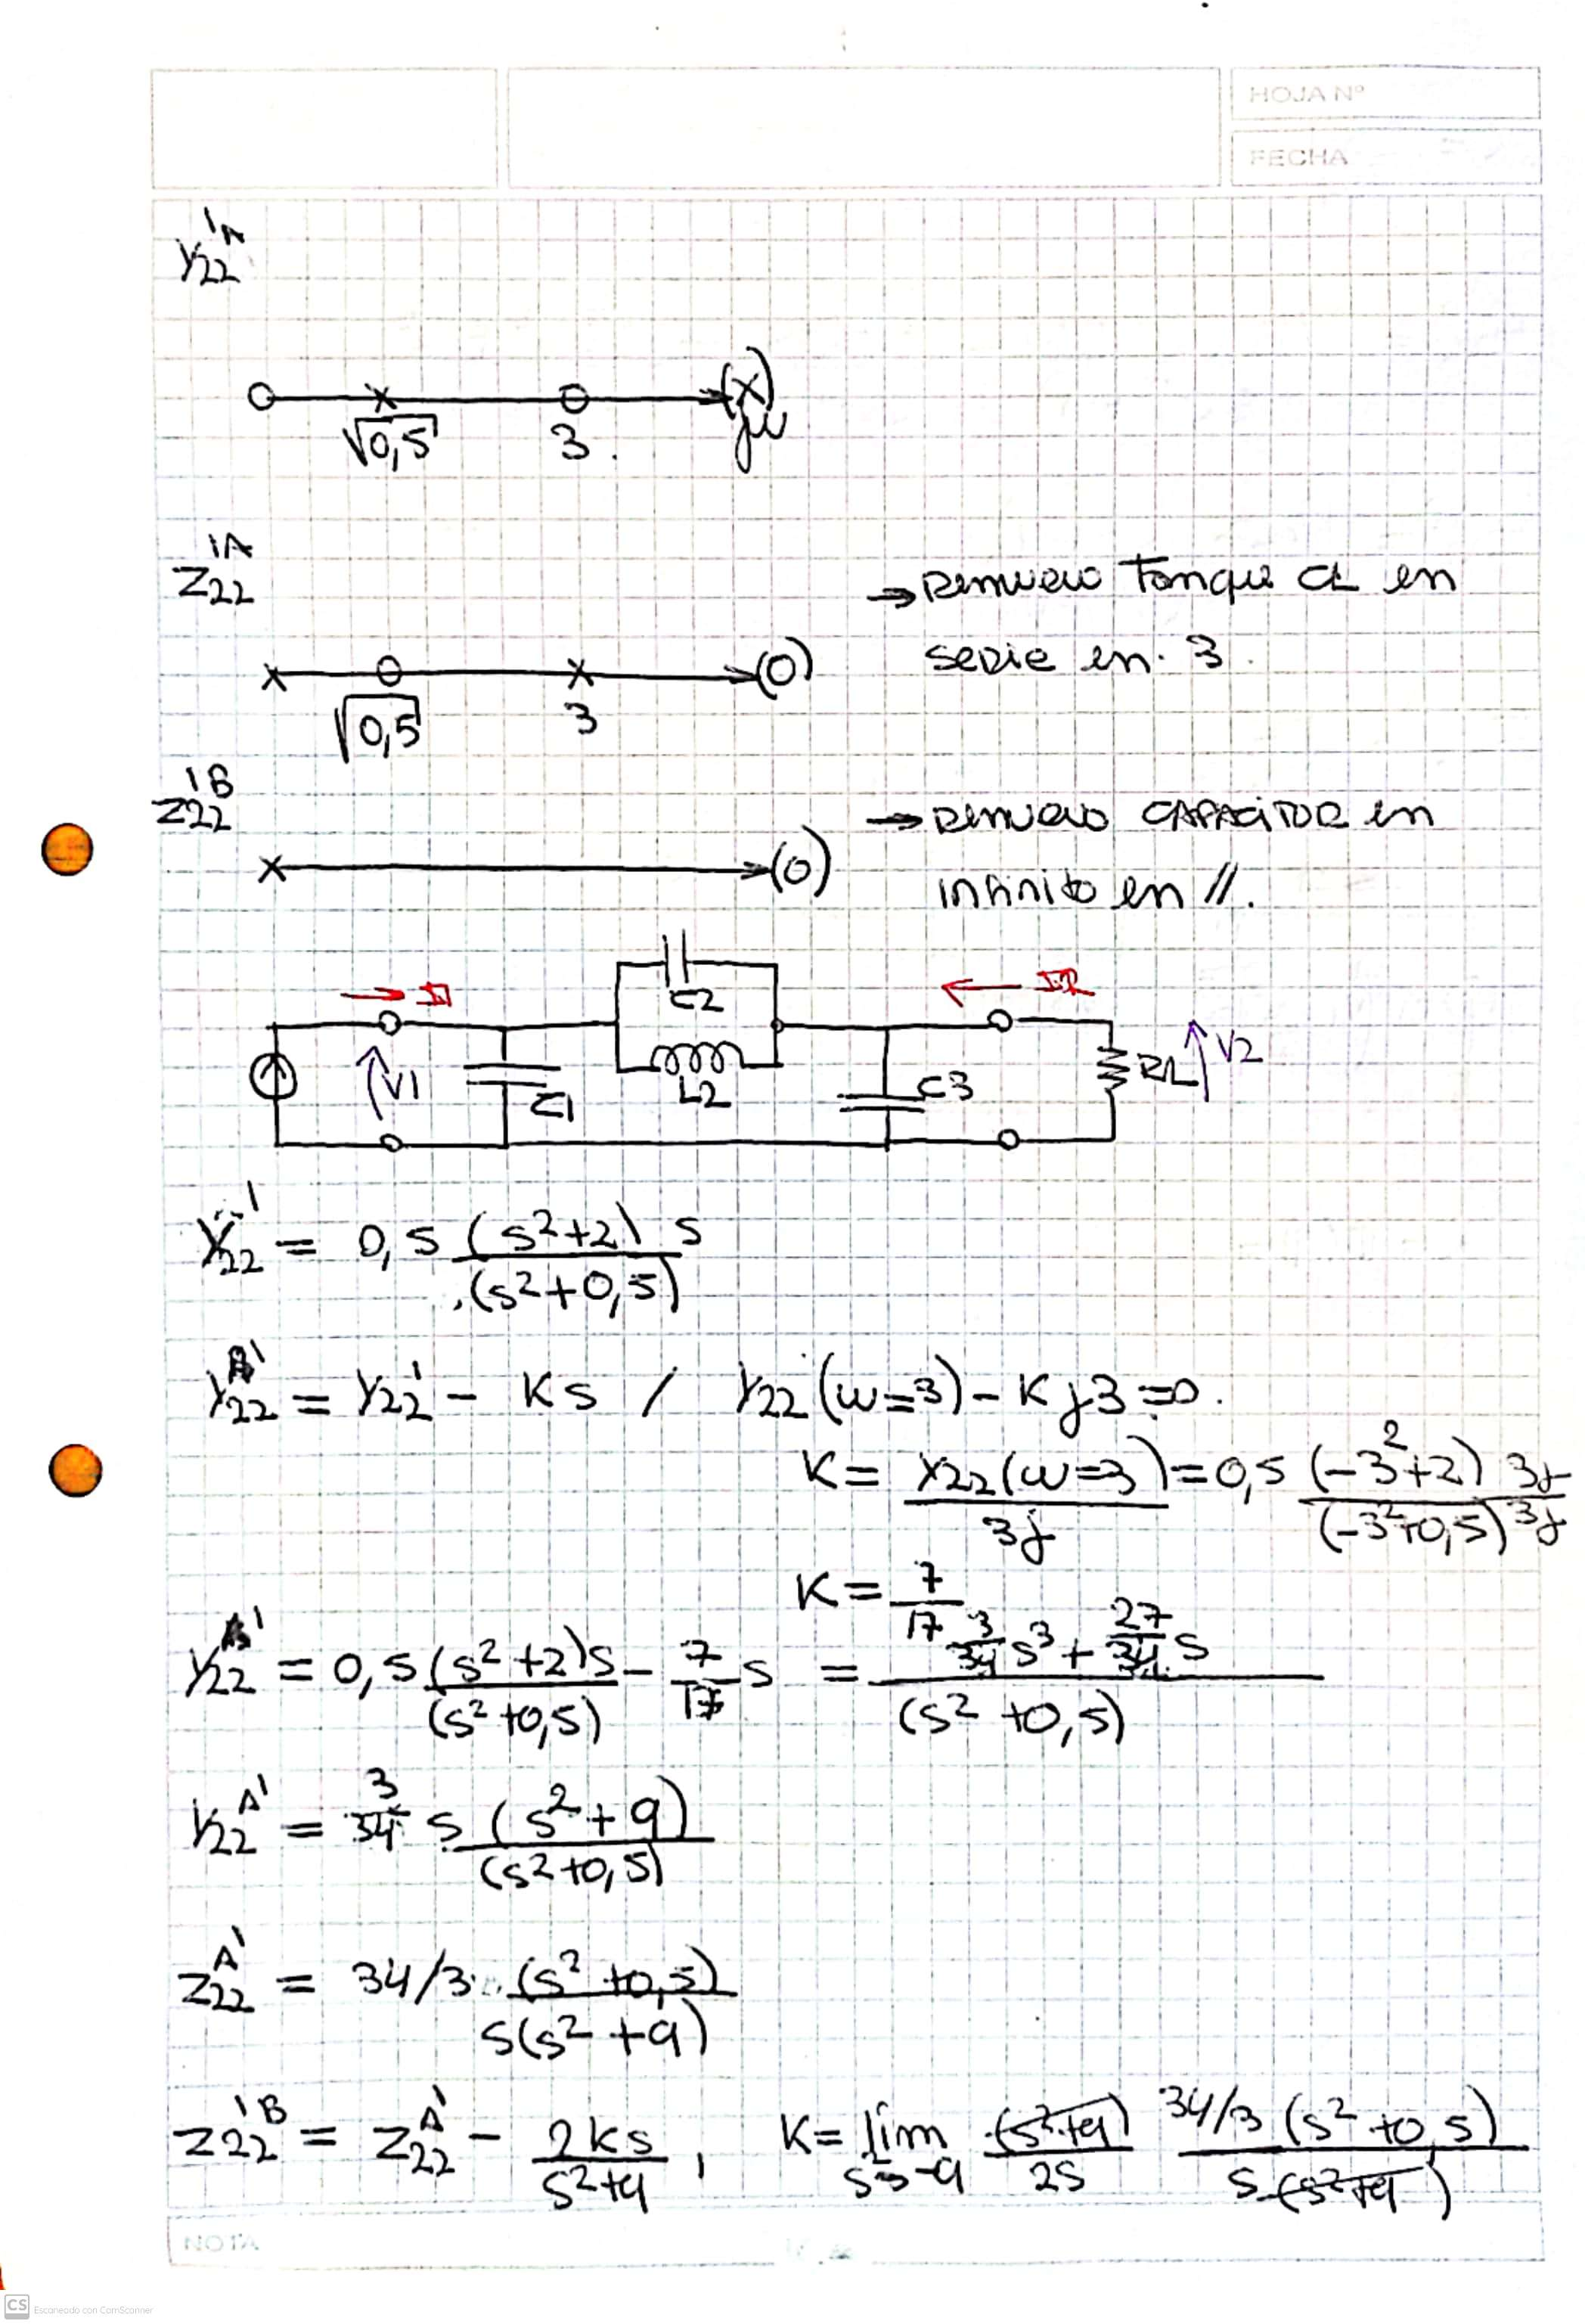

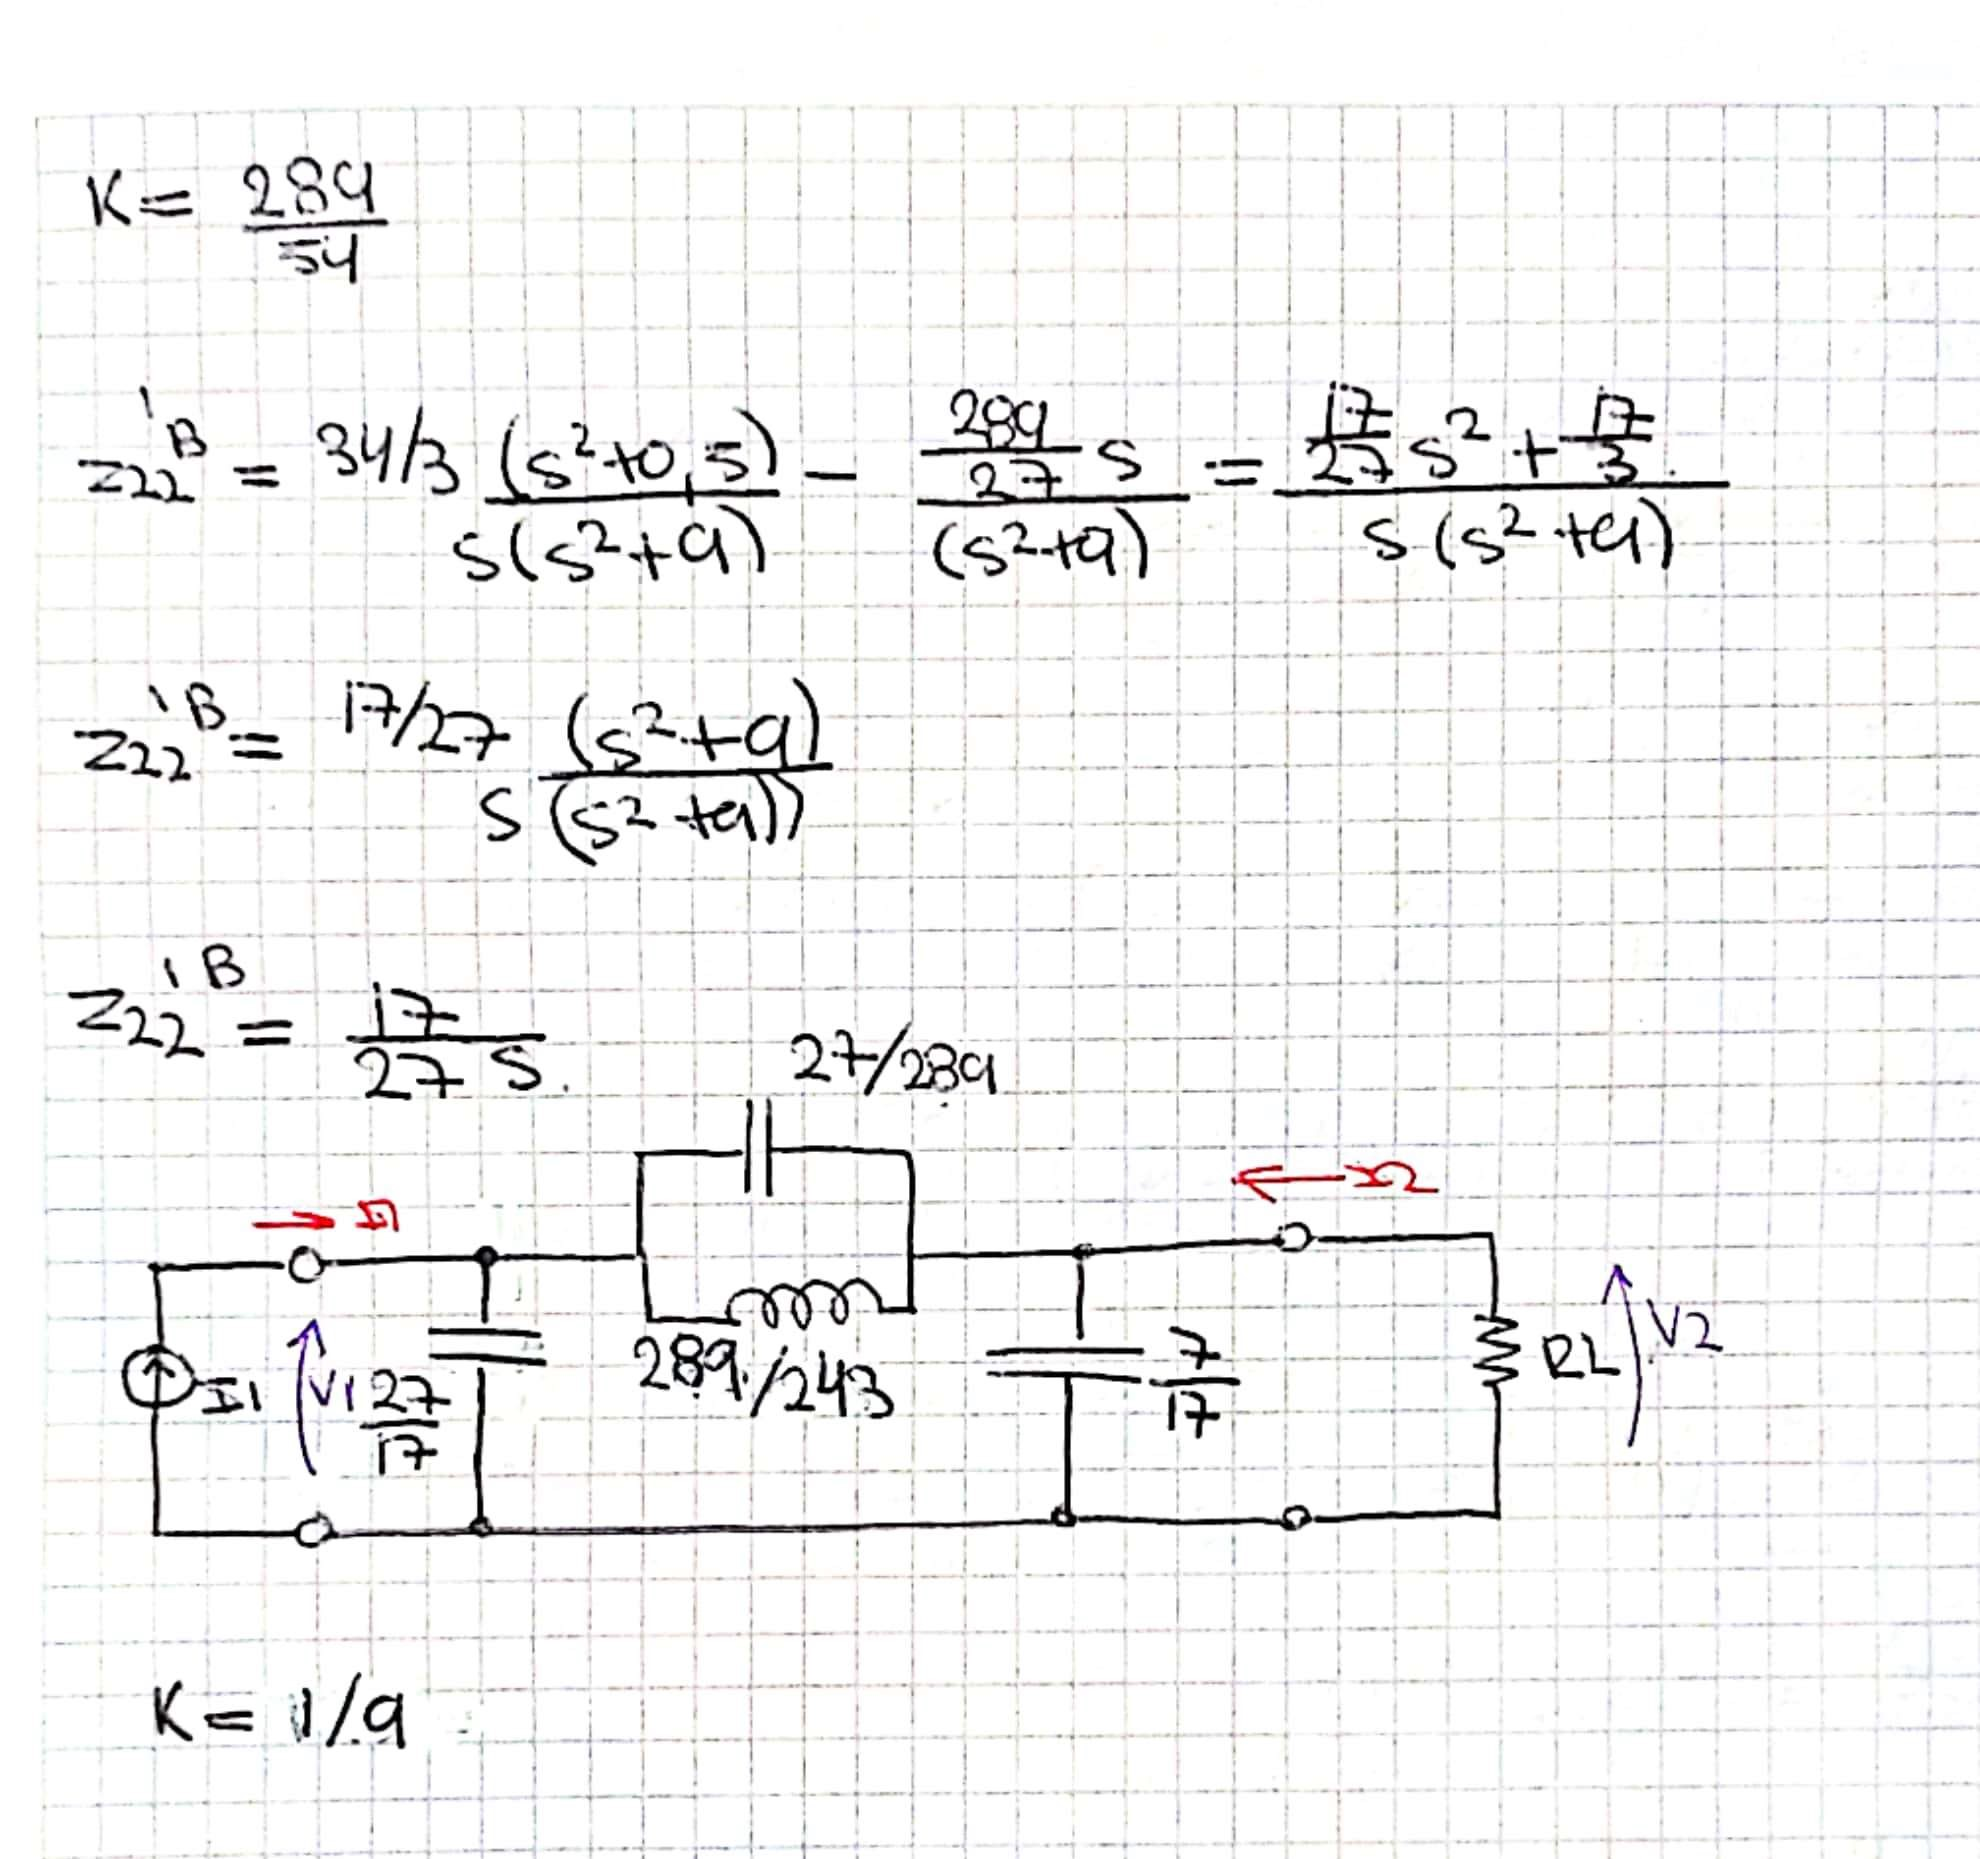

## Simulacion

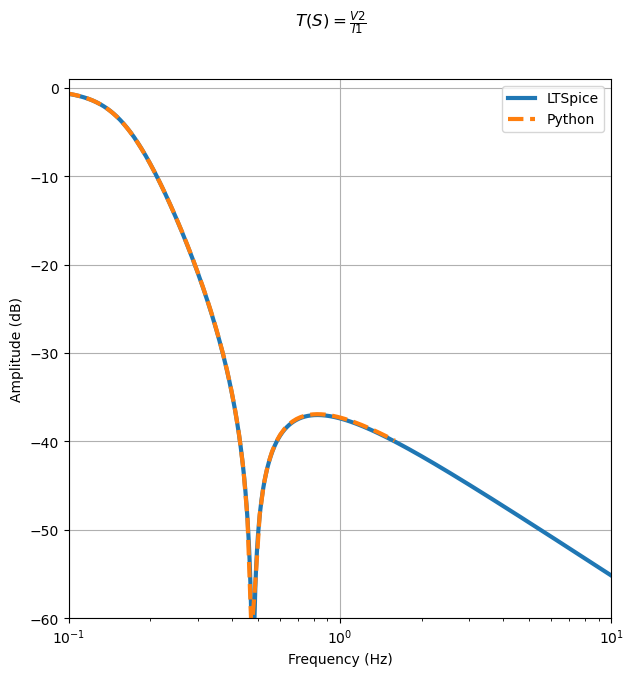

In [15]:
#%% Punto 2

l = ltspice.Ltspice('Punto 2.raw')
l.parse()

freq = l.get_frequency()
T =l.get_data('V(VRL)')

fig, ax = plt.subplots(1, 1, figsize=(7,7))
fig.suptitle(r'$T(S) = \frac{V2}{I1}$')

ax.semilogx(freq, 20 * np.log10(np.abs(T)), label='LTSpice',linewidth=3)


ax.grid()
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Amplitude (dB)")

k=1/9

num = k*np.array([1,0,9])
den = np.array([1,2,2,1])


w,H = sig.freqs(num,den)

ax.semilogx(w/(2*np.pi),20*np.log10(np.abs(H)),label='Python',ls='--',linewidth=3)
ax.set_xlim([10**(-1),10])
ax.set_ylim([-60,1])
plt.legend()
plt.show()

 ### Aclaracion:No me anduvo la simulacion simbolica para este paso, al remover el tanque L2C2 no me daba ningun valor